# HOW TO ANALYZE SENTIMENT USING VADER

## SENTIMENT ANALYSIS

Used to analyze the emotion of the text. 

To put it briely, the process of detecting a positive or negative emotion of a text.

Using sentiment analysis we can detect whether the given sentence, paragraph or a document contains a positive or negative emotion/opinion in it.

A tool for the companies to know their customers in-depth.

To know what kind of emotion/sentiment do customers have for them. 

Companies can improve their products/services based on the analysis of customer sentiments.


## VADER SENTIMENT TOOL

Stands for Valence Aware Dictionary and Sentiment Reasoner. 

More information: https://github.com/markok20/vaderSentiment

A lexicon and rule based tool for sentiment analysis. 

Specialized in measuring sentiment in social media.

Used for analyzing the sentiment of text which contains both positive and negative polarity. 

The objective is to quantify how much of positive or negative emotion is present in the text. 

It can also measure the intensity of emotion.

Open sourced, cost nothing.


## ADVANTAGES OF VADER

No requirement of training and testing dataset.

Understands easily the sentiment of a text.

Specialized in measuring sentiment in social media.

Listens to what people are saying about them and their products and services in social media.

Whether people’s opinion is positive or negative and if this sentiment polarity is changing over time. 

Easy to use.

Sentiment analysis of social media data has to be by far the most popular application of NLP on social data.

## CHALLENGES IN GENERAL

Sarcasm. 

Some might have both positive and negative opinions.


## NLP DATA PIPELINE

Data acquisition

Text cleaning

Pre-processing: tokenization, POS Tagging, removing stopwords, lemmatization

Feature engineering

Modeling

Evaluation

Deployment

Monitoring and model updating

## INSTALLING VADER

Step: Install VADER by using the following command

To install this package with conda run:

conda install -c conda-forge vadersentiment

In [1]:
# Import library

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Import library

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# Preparing the sentiment tool, creating Sentiment Intensity Analyzer Object

sentiment = SentimentIntensityAnalyzer()

In [4]:
# calculating sentiment of a text, positive
# Text is 0.0% Negative, 19.2% Neutral, 80.8% Positive. While the compound score is 63.69%.

sentiment.polarity_scores("I love football.")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [5]:
# calculating sentiment, positive
# NOTE: the compound score increases because of capital word & exclamation mark.

print(sentiment.polarity_scores("I LOVE football!!"))

{'neg': 0.0, 'neu': 0.153, 'pos': 0.847, 'compound': 0.7592}


In [6]:
# calculating sentiment, positive
# NOTE: the compound score increases because of smiley.

print(sentiment.polarity_scores("I love football :)"))

{'neg': 0.0, 'neu': 0.122, 'pos': 0.878, 'compound': 0.802}


In [7]:
# calculating sentiment, negative
# Text is 78.7% Negative, 21.3% Neutral, 0.0% Positive. While the compound score is -57.19%.

print(sentiment.polarity_scores("I hate football."))

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}


In [8]:
# calculating sentiment, neutral
# Text is 0.0% Negative, 100.0% Neutral, 0.0% Positive. While the compound score is 0.00%.

print(sentiment.polarity_scores("Alex is a footballer."))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [9]:
# calculating sentiment, border case example 
# Text is 26.2% Negative, 45.2% Neutral, 28.5% Positive. While the compound score is -12.80%.

print(sentiment.polarity_scores("I loved the football game but hated Lionel Messi. I guess it was a good game."))

{'neg': 0.262, 'neu': 0.452, 'pos': 0.285, 'compound': -0.128}


## ABOUT THE SCORING:

SentimentIntensityAnalyzer() is an object.

Polarity_scores is a method which gives us scores of the following categories:

Positive

Negative

Neutral

The more compound score closer to +1, the higher the positivity of the text.

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a normalized, weighted composite score is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. 

Typical threshold values are:

positive sentiment: compound score >= 0.05

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

negative sentiment: compound score <= -0.05

# CASE

Airport service quality Twitter dataset

Measuring the sentiment

313 376 rows

13 columns

In [10]:
# importing libraries

import numpy as np 
import nltk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [11]:
# already text preprocessed data in

data = pd.read_csv('newcleaneddata17082021.csv')
data.head(10)

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'..."
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a..."
2,2,88734,12/24/2020 19:34:34,NaN,27616.0,868.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,[],[]
3,3,118233,6/23/2017 15:46:40,mike are you scheduled time arrival,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['mike', 'scheduled', 'time', 'arrival']","['mike', 'scheduled', 'time', 'arrival']"
4,4,118234,6/23/2017 15:47:31,looks like you will time and will make you sec...,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['looks', 'like', 'time', 'make', 'second', 'f...","['looks', 'like', 'time', 'make', 'second', 'f..."
5,5,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai..."
6,6,262833,8/29/2020 0:36:32,NaN,27451.0,452.0,0.0,2.0,@heathrowairport,LHR,Heathrow Airport,[],[]
7,7,274014,11/7/2016 6:42:56,amazing trip now way home with thx jfk for the...,90.0,318.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['amazing', 'trip', 'way', 'home', 'thx', 'jfk...","['amazing', 'trip', 'way', 'home', 'thx', 'jfk..."
8,8,274016,11/7/2016 7:01:51,from brazil get hours there and have nice flig...,1610.0,329.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['brazil', 'get', 'hours', 'nice', 'flight', '...","['brazil', 'get', 'hours', 'nice', 'flight', '..."
9,9,274022,11/7/2016 11:16:36,fast track yeah right slow,93.0,219.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['fast', 'track', 'yeah', 'right', 'slow']","['fast', 'track', 'yeah', 'right', 'slow']"


In [12]:
# 313 376 rows

# 13 columns

data.shape

(313376, 13)

In [13]:
# importing libraries

import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# checking null values

data.isnull().any().any()

True

In [15]:
# checking null values

data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313376 entries, 0 to 313375
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           313376 non-null  int64  
 1   Unnamed: 0.1         313376 non-null  int64  
 2   Date                 313376 non-null  object 
 3   Tweet Text           278312 non-null  object 
 4   Followers            313376 non-null  float64
 5   Follows              313376 non-null  float64
 6   Retweets             313376 non-null  float64
 7   Favorites            313376 non-null  float64
 8   Airport_Twitter_Tag  313376 non-null  object 
 9   Airport_IATA_Codes   313376 non-null  object 
 10  Airport_Names        313376 non-null  object 
 11  tokens               313376 non-null  object 
 12  no_tokens            313376 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 31.1+ MB


<ipython-input-15-26593ddadbbc>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)


In [16]:
# checking null values

data_new = data[data['Tweet Text'].notnull()]

In [17]:
# checking null values

data_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278312 entries, 0 to 313375
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           278312 non-null  int64  
 1   Unnamed: 0.1         278312 non-null  int64  
 2   Date                 278312 non-null  object 
 3   Tweet Text           278312 non-null  object 
 4   Followers            278312 non-null  float64
 5   Follows              278312 non-null  float64
 6   Retweets             278312 non-null  float64
 7   Favorites            278312 non-null  float64
 8   Airport_Twitter_Tag  278312 non-null  object 
 9   Airport_IATA_Codes   278312 non-null  object 
 10  Airport_Names        278312 non-null  object 
 11  tokens               278312 non-null  object 
 12  no_tokens            278312 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 29.7+ MB


<ipython-input-17-6fc42301145a>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_new.info(null_counts=True)


In [18]:
# checking null values

data_new.isnull().any().any()

False

In [19]:
# calculating compound score and labeling vader score

data_new['vader_score'] = data_new['Tweet Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-19-d051e618e245>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_score'] = data_new['Tweet Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [20]:
# checking data and vader score column

data_new.head(15)

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens,vader_score
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'...",0.0000
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a...",0.0000
3,3,118233,6/23/2017 15:46:40,mike are you scheduled time arrival,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['mike', 'scheduled', 'time', 'arrival']","['mike', 'scheduled', 'time', 'arrival']",0.0000
4,4,118234,6/23/2017 15:47:31,looks like you will time and will make you sec...,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['looks', 'like', 'time', 'make', 'second', 'f...","['looks', 'like', 'time', 'make', 'second', 'f...",0.6597
5,5,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai...",0.0000
7,7,274014,11/7/2016 6:42:56,amazing trip now way home with thx jfk for the...,90.0,318.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['amazing', 'trip', 'way', 'home', 'thx', 'jfk...","['amazing', 'trip', 'way', 'home', 'thx', 'jfk...",0.8860
8,8,274016,11/7/2016 7:01:51,from brazil get hours there and have nice flig...,1610.0,329.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['brazil', 'get', 'hours', 'nice', 'flight', '...","['brazil', 'get', 'hours', 'nice', 'flight', '...",-0.0258
9,9,274022,11/7/2016 11:16:36,fast track yeah right slow,93.0,219.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['fast', 'track', 'yeah', 'right', 'slow']","['fast', 'track', 'yeah', 'right', 'slow']",0.2960
10,10,274023,11/7/2016 12:23:15,what with drop off lanes terminal the queue re...,358.0,379.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['drop', 'lanes', 'terminal', 'queue', 'reache...","['drop', 'lanes', 'terminal', 'queue', 'reache...",-0.2263
11,11,274024,11/7/2016 12:26:07,landan,195.0,1118.0,0.0,0.0,@gatwick_airport,LGW,Gatwick Airport LGW,['landan'],['landan'],0.0000


In [21]:
# checking positive and negative

positive_num = len(data_new[data_new['vader_score'] >=0.05])

negative_num = len(data_new[data_new['vader_score']<0.05])

In [22]:
# checking positive and negative

#positive_num,neutral_num, negative_num
positive_num, negative_num

(120013, 158299)

In [23]:
# adding vader sentiment label column

data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

<ipython-input-23-64f8b8163ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))


In [24]:
# adding vader sentiment label column

#data_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#data_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

# checking vader sentiment label column

data_new.head()

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens,vader_score,vader_sentiment_label
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'...",0.0000,0
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a...",0.0000,0
3,3,118233,6/23/2017 15:46:40,mike are you scheduled time arrival,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['mike', 'scheduled', 'time', 'arrival']","['mike', 'scheduled', 'time', 'arrival']",0.0000,0
4,4,118234,6/23/2017 15:47:31,looks like you will time and will make you sec...,37810.0,1849.0,0.0,0.0,@schiphol,AMS,Amsterdam Airport Schiphol,"['looks', 'like', 'time', 'make', 'second', 'f...","['looks', 'like', 'time', 'make', 'second', 'f...",0.6597,1
5,5,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai...",0.0000,0


In [25]:
# checking positive, neutral and negative

positive_num = len(data_new[data_new['vader_score'] >=0.05])
neutral_num = len(data_new[(data_new['vader_score'] >-0.05) & (data_new['vader_score']<0.05)])
negative_num = len(data_new[data_new['vader_score']<=-0.05])

In [26]:
# checking positive, neutral and negative

positive_num,neutral_num, negative_num

(120013, 112398, 45901)

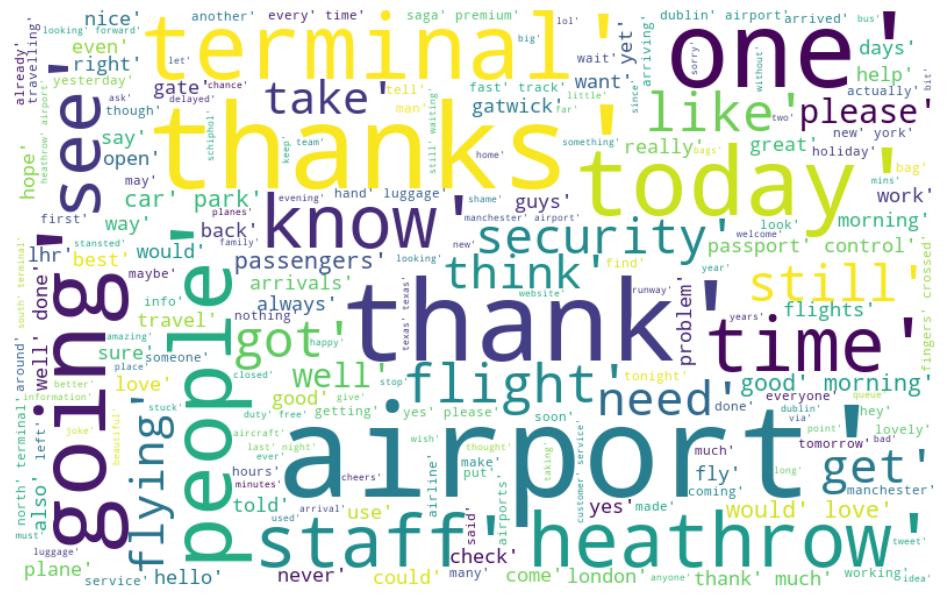

In [27]:
# all tokens illustrated in wordcloud

all_words = ' '.join([text for text in data_new['no_tokens']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

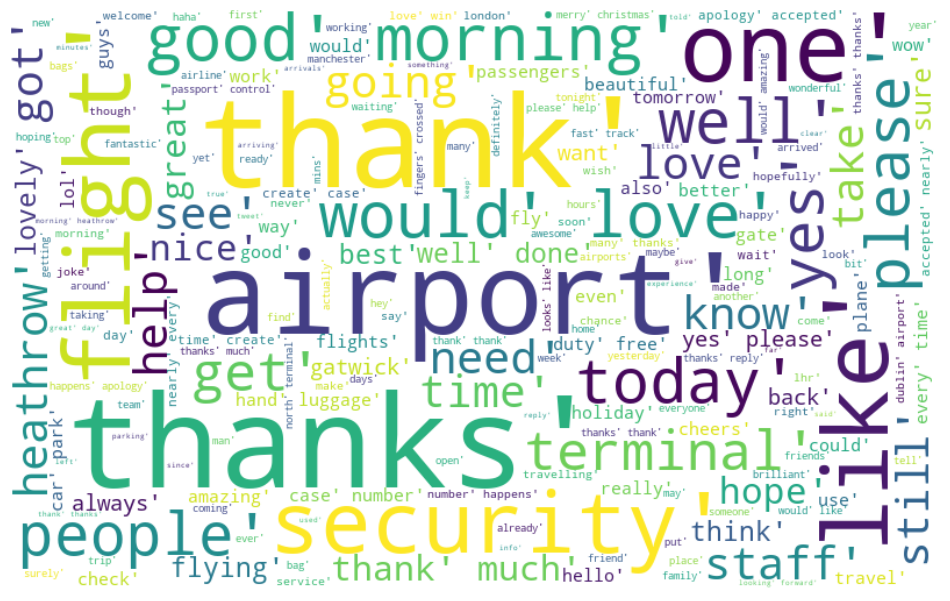

In [28]:
# all tokens illustrated in wordcloud but positive sentiment
# security, staff, arrived time, luggage, beautiful, passport control

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

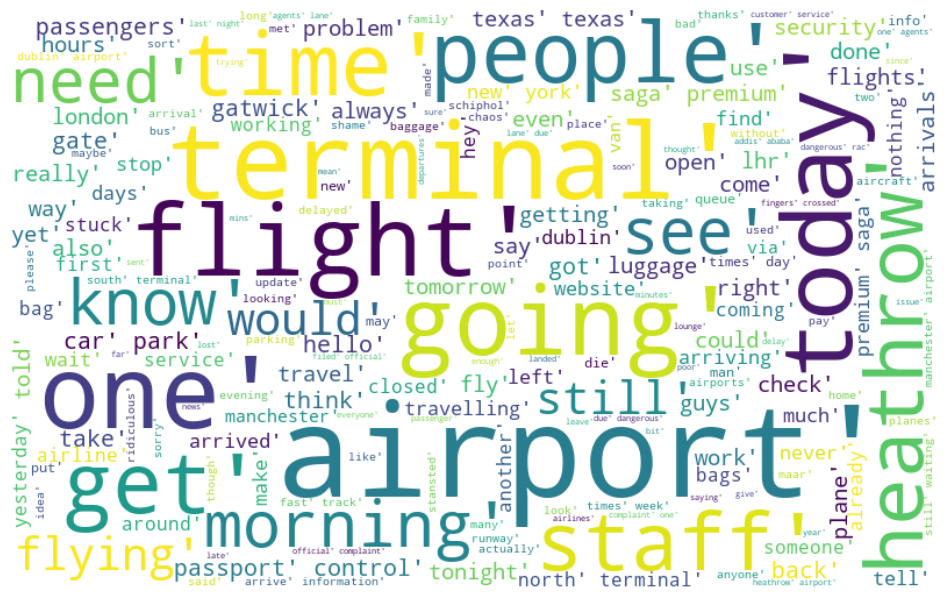

In [29]:
# all tokens illustrated in wordcloud but negative sentiment
# time, security, gate, bus, baggege, luggage, stuck, bag, car parking, passport control, staff

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 0]])

wordcloud = WordCloud(width=800, background_color='white', height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()